## Time-Series Recurrent Variational Autoencoder

Let's start by choosing some data. It's fun to use audio because we can listen to the results, so I'm going to load an Erik Satie piano piece.

In [1]:
import torch
import torchaudio
import torch.nn as nn

In [2]:
import requests

In [3]:
useragent = "FetchingBot/1.0 (callistb@pdx.edu)"

In [4]:
file_urls = [
    'https://upload.wikimedia.org/wikipedia/commons/9/90/Erik_Satie_-_gymnopedies_-_la_1_ere._lent_et_douloureux.ogg'
]

results = []
for url in file_urls:
    results.append(requests.get(url, headers={'User-Agent': useragent}))

In [5]:
from io import BytesIO

In [6]:
wave, rate = torchaudio.load(BytesIO(results[0].content))

In [7]:
wave.shape

torch.Size([2, 8096256])

In [8]:
# Let's make this mono for now
wave = wave.mean(0)

In [9]:
import matplotlib.pyplot as plt

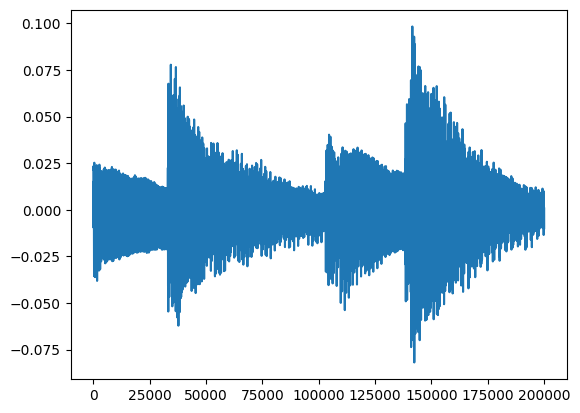

In [10]:
plt.plot(wave[100000:300000])

In [11]:
from IPython.display import Audio

In [14]:
Audio(wave[100000:300000], rate=rate)

### Dataset generation

Let's slice up the file into a dataset of 0.5 second patches

In [52]:
delta = int(rate * 0.5)
dataset = torch.stack([
    wave[start:start+delta].unsqueeze(-1)
    for start in range(0, len(wave) - delta, delta)
])

In [53]:
dataset.shape

torch.Size([367, 22050, 1])

In [83]:
train_N = int(0.7 * len(dataset))
train_loader = torch.utils.data.DataLoader(dataset[:train_N], batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset[train_N:], batch_size=16)

In [85]:
len(iter(train_loader))

16

### Autoencoder Specification

In [ ]:
class Decoder(nn.Module):
    
    def __init__(self, hidden_dim=256, embedding_dim=128, output_dim=1):
        super.__init__()
        
        self.gru = nn.GRU(input_size = embedding_dim, hidden_size = hidden_dim)

In [59]:
device = "cuda:3"

In [60]:
gru = nn.GRU(input_size=1, hidden_size=128, batch_first=True).to(device)

In [67]:
out, h = gru(next(iter(train_loader)).to(device))

In [70]:
out.shape

torch.Size([64, 22050, 128])